In [62]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

In [63]:
plt.rc('font', size=26)          # text size
plt.rc('axes', titlesize=26)     # axes title size
plt.rc('axes', labelsize=26)     # axes label size
plt.rc('xtick', labelsize=22)    # x-tick label size
plt.rc('ytick', labelsize=22)    # y-tick label size
plt.rc('legend', fontsize=24)    # legend font size
plt.rc('figure', titlesize=30)   # figure title size

In [70]:
def extract_data(folder):
    data_dict = {}
    
    for filename in os.listdir(folder):
        if filename.endswith('.csv'):
            file_path = os.path.join(folder, filename)
            
            try:
                data = np.genfromtxt(file_path, delimiter=',', skip_header=8, usecols=(1, 2, 3))
                
                data = data[~np.isnan(data).any(axis=1)]
                
                file_key = os.path.splitext(filename)[0]
                freq_var = f'{file_key}_freq_data'
                ch1_amp_var = f'{file_key}_ch1_amp_data'
                ch2_amp_var = f'{file_key}_ch2_amp_data'
                
                freq_data = data[:, 0]
                ch1_amp_data = data[:, 1]
                ch2_amp_data = data[:, 2]
                
                data_dict[freq_var] = freq_data
                data_dict[ch1_amp_var] = ch1_amp_data
                data_dict[ch2_amp_var] = ch2_amp_data
                
            except Exception as e:
                print(f'Error reading {filename}: {e}')
                
    return data_dict

def numeric_value_from_label(label): # used to put labels in numerical order in legends
    match = re.search(r'\d+', label)
    return float(match.group()) if match else None

folder = 'Data/4a-Rev/4a' 
data = extract_data(folder)

data_headers = ['Part2aDataResBW7Point8kHz_highest_res', 'Part2aDataResBW7Point63Hz_lowest_res', 
                'Part2aDataResBW61Point04Hz', 'Part2aDataResBW488Point28Hz', 'Part2aDataResBW244Point14Hz', 
                'Part2aDataResBW122Point07Hz']  

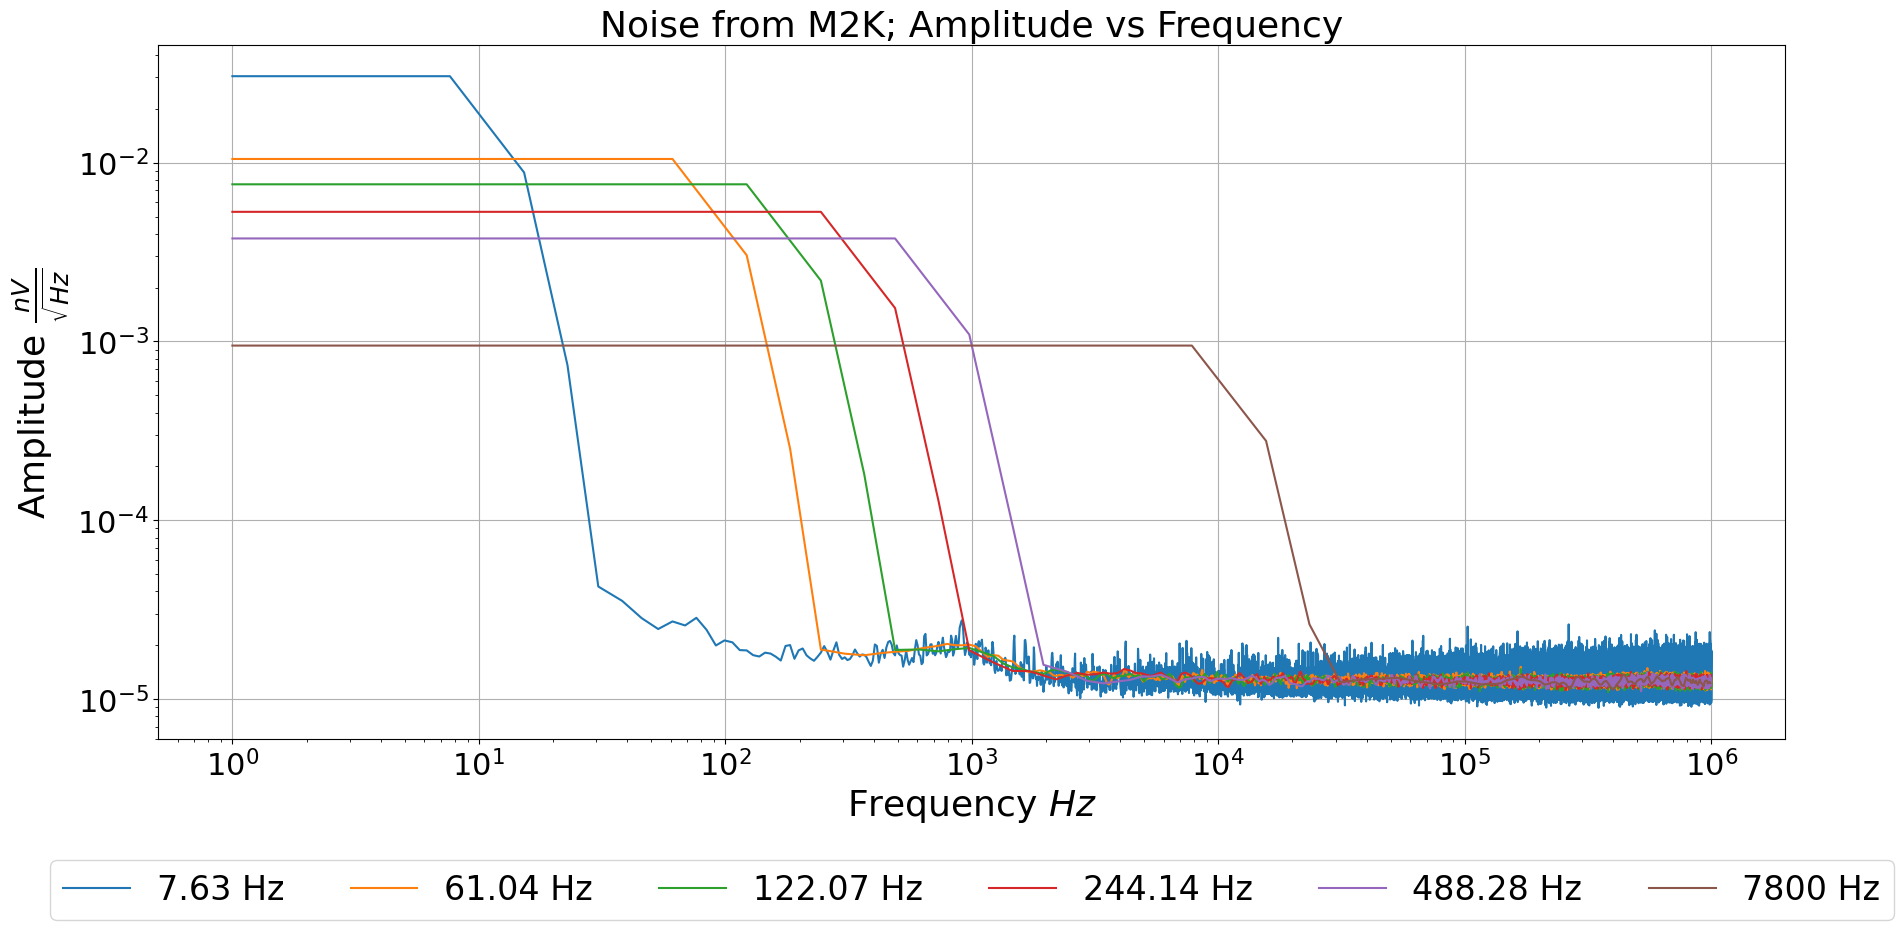

In [204]:
data_folder = 'Data/4a-Rev/4a - Copy'
data1 = extract_data(data_folder)

data_headers1 = ['ResBW122p07Hz', 'ResBW244p14Hz', 'ResBW488p28Hz', 
                 'ResBW61p04Hz', 'ResBW7800Hz', 'ResBW7p63Hz']

title = f'Noise from M2K'

entries = []

# Define how many frequencies to skip for each label
skip_mapping = {
    'ResBW122p07Hz': 0,
    'ResBW244p14Hz': 0,
    'ResBW488p28Hz': 0,
    'ResBW61p04Hz': 0,
    'ResBW7800Hz': 0,
    'ResBW7p63Hz': 0,
}

# Loop through data headers and gather entries
for data_header1 in data_headers1:
    for key, value in data1.items():
        if key.startswith(data_header1) and key.endswith('_freq_data'):
            base_name = key[:-10]
            freq_key = f'{base_name}_freq_data'
            ch1_amp_key = f'{base_name}_ch1_amp_data'
            ch2_amp_key = f'{base_name}_ch2_amp_data'

            if freq_key in data1:
                label_part = base_name
                freq_data = value
                ch1_amp_data = data1[ch1_amp_key]
                ch2_amp_data = data1[ch2_amp_key]

                numeric_label = numeric_value_from_label(label_part)

                skip = skip_mapping.get(label_part, 0) 

                cut_freq_data = freq_data[skip:]
                cut_ch1_amp_data = ch1_amp_data[skip:]
                cut_ch2_amp_data = ch2_amp_data[skip:]
                
                # Format the label for display
                formatted_label = label_part.replace('ResBW', '').replace('p', '.')
                formatted_label = formatted_label[:-2] + ' Hz'  # Last two characters are 'Hz'

                # Extract numeric value for sorting
                numeric_value = float(formatted_label[:-3])  # Get numeric part before ' Hz'

                entries.append({
                    'label': formatted_label,
                    'numeric_label': numeric_label,
                    'freq_data': cut_freq_data,
                    'ch1_amp_data': cut_ch1_amp_data,
                    'ch2_amp_data': cut_ch2_amp_data,
                    'sort_key': numeric_value  # Store numeric value for sorting
                })

# Sort entries by the numeric value of the formatted label
entries = sorted(entries, key=lambda x: x['sort_key'])

# Create a plot
plt.figure(figsize=(20, 10))

line_handles = []

for entry in entries:
    line, = plt.plot(entry['freq_data'], entry['ch1_amp_data'], label=f"{entry['label']}")
    line_handles.append(line)

plt.xlabel(r'Frequency $Hz$ ')
plt.xscale('log')
plt.ylabel(r'Amplitude $\frac{nV}{\sqrt{Hz}}$')
plt.yscale('log')
plt.title(f'{title}; Amplitude vs Frequency')
plt.grid(True)

plt.legend(handles=line_handles, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=6)

output_path = f'Plots/4a_plots/{title}.png'
plt.savefig(output_path, format='png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

Ch1 Noise Average: 1.2536053399647443e-05
Ch1 Noise Average: 1.2591889448501635e-05
Ch1 Noise Average: 1.2555419284994964e-05
Ch1 Noise Average: 1.2634957894736843e-05
Ch1 Noise Average: 1.254249435483871e-05
Ch1 Noise Average: 1.2427333501243389e-05


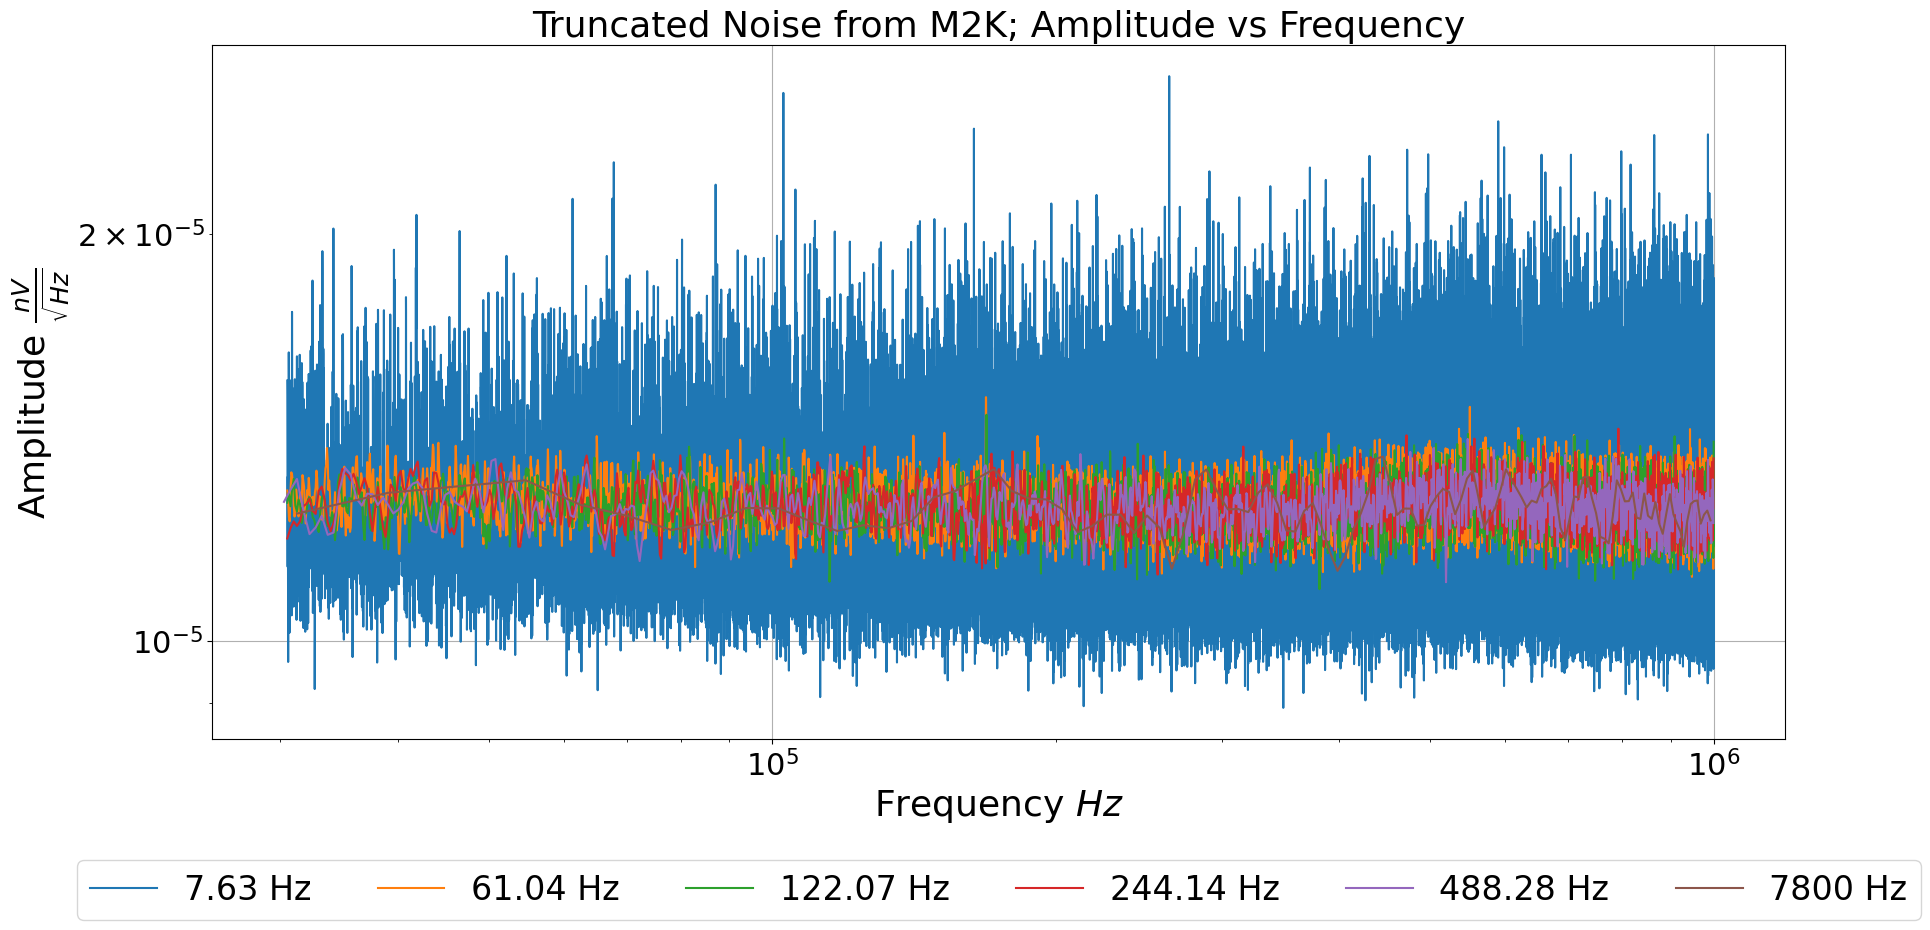

In [205]:
data_folder = 'Data/4a-Rev/4a - Copy'
data1 = extract_data(data_folder)

data_headers1 = ['ResBW122p07Hz', 'ResBW244p14Hz', 'ResBW488p28Hz', 
                 'ResBW61p04Hz', 'ResBW7800Hz', 'ResBW7p63Hz']

title = f'Truncated Noise from M2K'

entries = []

skip_mapping = {
    'ResBW122p07Hz': 250,
    'ResBW244p14Hz': 125,
    'ResBW488p28Hz': 62,
    'ResBW61p04Hz': 500,
    'ResBW7800Hz': 4, 
    'ResBW7p63Hz': 4000, 
}

for data_header1 in data_headers1:
    for key, value in data1.items():
        if key.startswith(data_header1) and key.endswith('_freq_data'):
            base_name = key[:-10]
            freq_key = f'{base_name}_freq_data'
            ch1_amp_key = f'{base_name}_ch1_amp_data'
            ch2_amp_key = f'{base_name}_ch2_amp_data'

            if freq_key in data1:
                label_part = base_name
                freq_data = value
                ch1_amp_data = data1[ch1_amp_key]
                ch2_amp_data = data1[ch2_amp_key]

                numeric_label = numeric_value_from_label(label_part)

                skip = skip_mapping.get(label_part, 0) 

                cut_freq_data = freq_data[skip:]
                cut_ch1_amp_data = ch1_amp_data[skip:]
                cut_ch2_amp_data = ch2_amp_data[skip:]
                print(f'Ch1 Noise Average: {np.mean(cut_ch1_amp_data)}')
                
                formatted_label = label_part.replace('ResBW', '').replace('p', '.')
                formatted_label = formatted_label[:-2] + ' Hz'  # Last two characters are 'Hz'

                numeric_value = float(formatted_label[:-3])  # Get numeric part before ' Hz'

                entries.append({
                    'label': formatted_label,
                    'numeric_label': numeric_label,
                    'freq_data': cut_freq_data,
                    'ch1_amp_data': cut_ch1_amp_data,
                    'ch2_amp_data': cut_ch2_amp_data,
                    'sort_key': numeric_value  # Store numeric value for sorting
                })

entries = sorted(entries, key=lambda x: x['sort_key'])

plt.figure(figsize=(20, 10))

line_handles = []

for entry in entries:
    line, = plt.plot(entry['freq_data'], entry['ch1_amp_data'], label=f"{entry['label']}")
    line_handles.append(line)

plt.xlabel(r'Frequency $Hz$ ')
plt.xscale('log')
plt.ylabel(r'Amplitude $\frac{nV}{\sqrt{Hz}}$')
plt.yscale('log')
plt.title(f'{title}; Amplitude vs Frequency')
plt.grid(True)

plt.legend(handles=line_handles, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=6)

output_path = f'Plots/4a_plots/{title}.png'
plt.savefig(output_path, format='png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

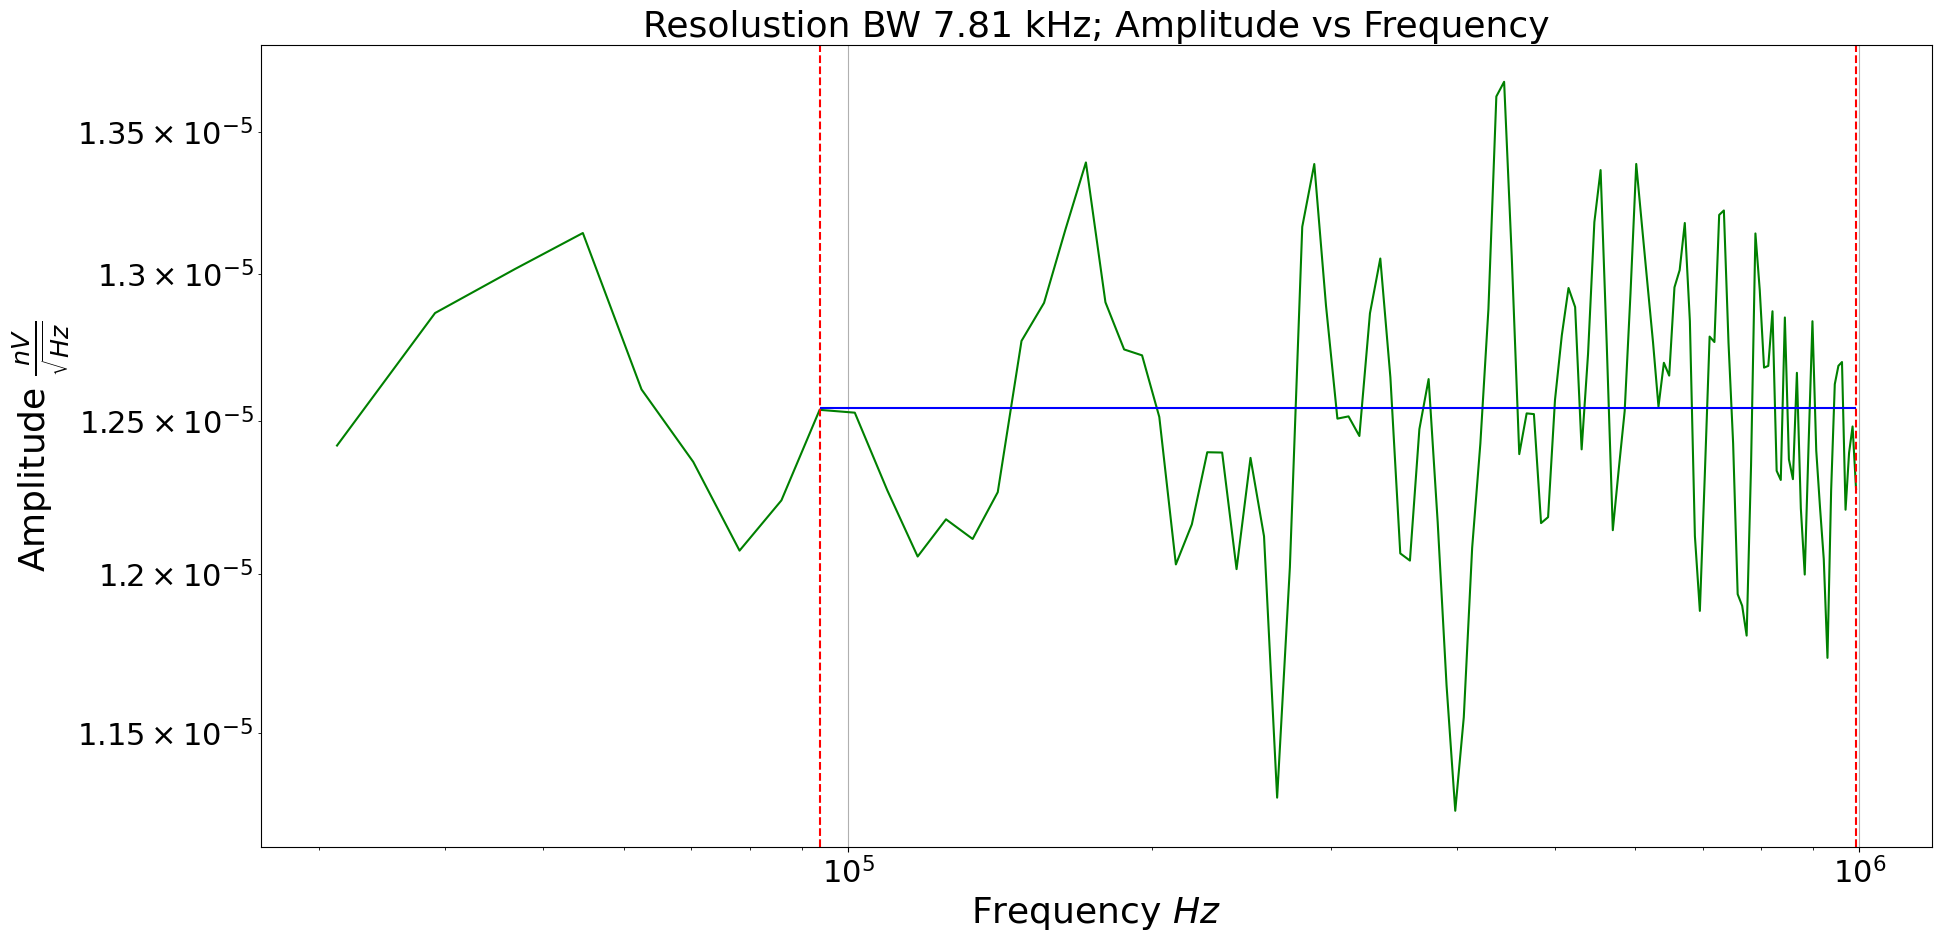

In [16]:
# ch1 was put in high mode
skip = 4
data_header = data_headers[0] 
title = f'Resolustion BW 7.81 kHz'

entries = []


for key, value in data.items():
    if key.startswith(data_header) and key.endswith('_freq_data'):
        base_name = key[:-10]
        freq_key = f'{base_name}_freq_data'
        ch1_amp_key = f'{base_name}_ch1_amp_data'
        ch2_amp_key = f'{base_name}_ch2_amp_data'
        
        if freq_key in data:
            label_part = base_name[len(data_header):]
            print(label_part)
            freq_data = value
            ch1_amp_data = data[ch1_amp_key]
            ch2_amp_data = data[ch2_amp_key]

            numeric_label = numeric_value_from_label(label_part)

            cut_freq_data = freq_data[skip:]
            cut_ch1_amp_data = ch1_amp_data[skip:]
            cut_ch2_amp_data = ch2_amp_data[skip:]

            corner_freq_index = 4
            corner_freq = cut_freq_data[corner_freq_index]

            white_noise_index1 = 8
            white_noise_index2 = 123
            white_noise_freq1 = cut_freq_data[white_noise_index1]
            white_noise_freq2 = cut_freq_data[white_noise_index2]

            white_noise1 = np.mean(cut_ch1_amp_data[white_noise_index1:white_noise_index2])
            white_noise2 = np.mean(cut_ch2_amp_data[white_noise_index1:white_noise_index2])

            entries.append({
                'label': label_part,
                'numeric_label': numeric_label,
                'freq_data': cut_freq_data,
                'ch1_amp_data': cut_ch1_amp_data,
                'ch2_amp_data': cut_ch2_amp_data,
                'corner_freq': corner_freq,
                'white_noise_freq1': white_noise_freq1, 
                'white_noise_freq2': white_noise_freq2, 
                'white_noise1': white_noise1,
                'white_noise2': white_noise2
            })

#entries = sorted(entries, key=lambda x: x['numeric_label'])

plt.figure(figsize=(20, 10))

line_handles = []

for entry in entries:
    line, = plt.plot(entry['freq_data'], entry['ch1_amp_data'], color='green')# label=f'Ch1')
    #line, = plt.plot(entry['freq_data'], entry['ch2_amp_data'], label=f'Ch2')
    line_handles.append(line)

plt.axvline(white_noise_freq1, color='red', linestyle='--')#, label=f"f1: {white_noise_freq1}")
plt.axvline(white_noise_freq2, color='red', linestyle='--')#, label=f"f2: {white_noise_freq2}")
plt.hlines(y=white_noise1, xmin=white_noise_freq1, xmax=white_noise_freq2, 
           color='blue', linestyle='-', label=f'White Noise Avg ~ {white_noise1:.3e} ' r'$V/\sqrt{Hz}$')
plt.xlabel(r'Frequency $Hz$ ')
plt.xscale('log')
plt.ylabel(r'Amplitude $\frac{nV}{\sqrt{Hz}}$')
plt.yscale('log')
plt.title(f'{title}; Amplitude vs Frequency')
plt.grid(True)
#plt.legend(loc='lower left')

#output_path = f'Plots/4a_plots/{title}.png'
#plt.savefig(output_path, format='png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

#print(f'Ch1 white noise: {white_noise1}')
#print(f'Ch2 white noise: {white_noise2}')

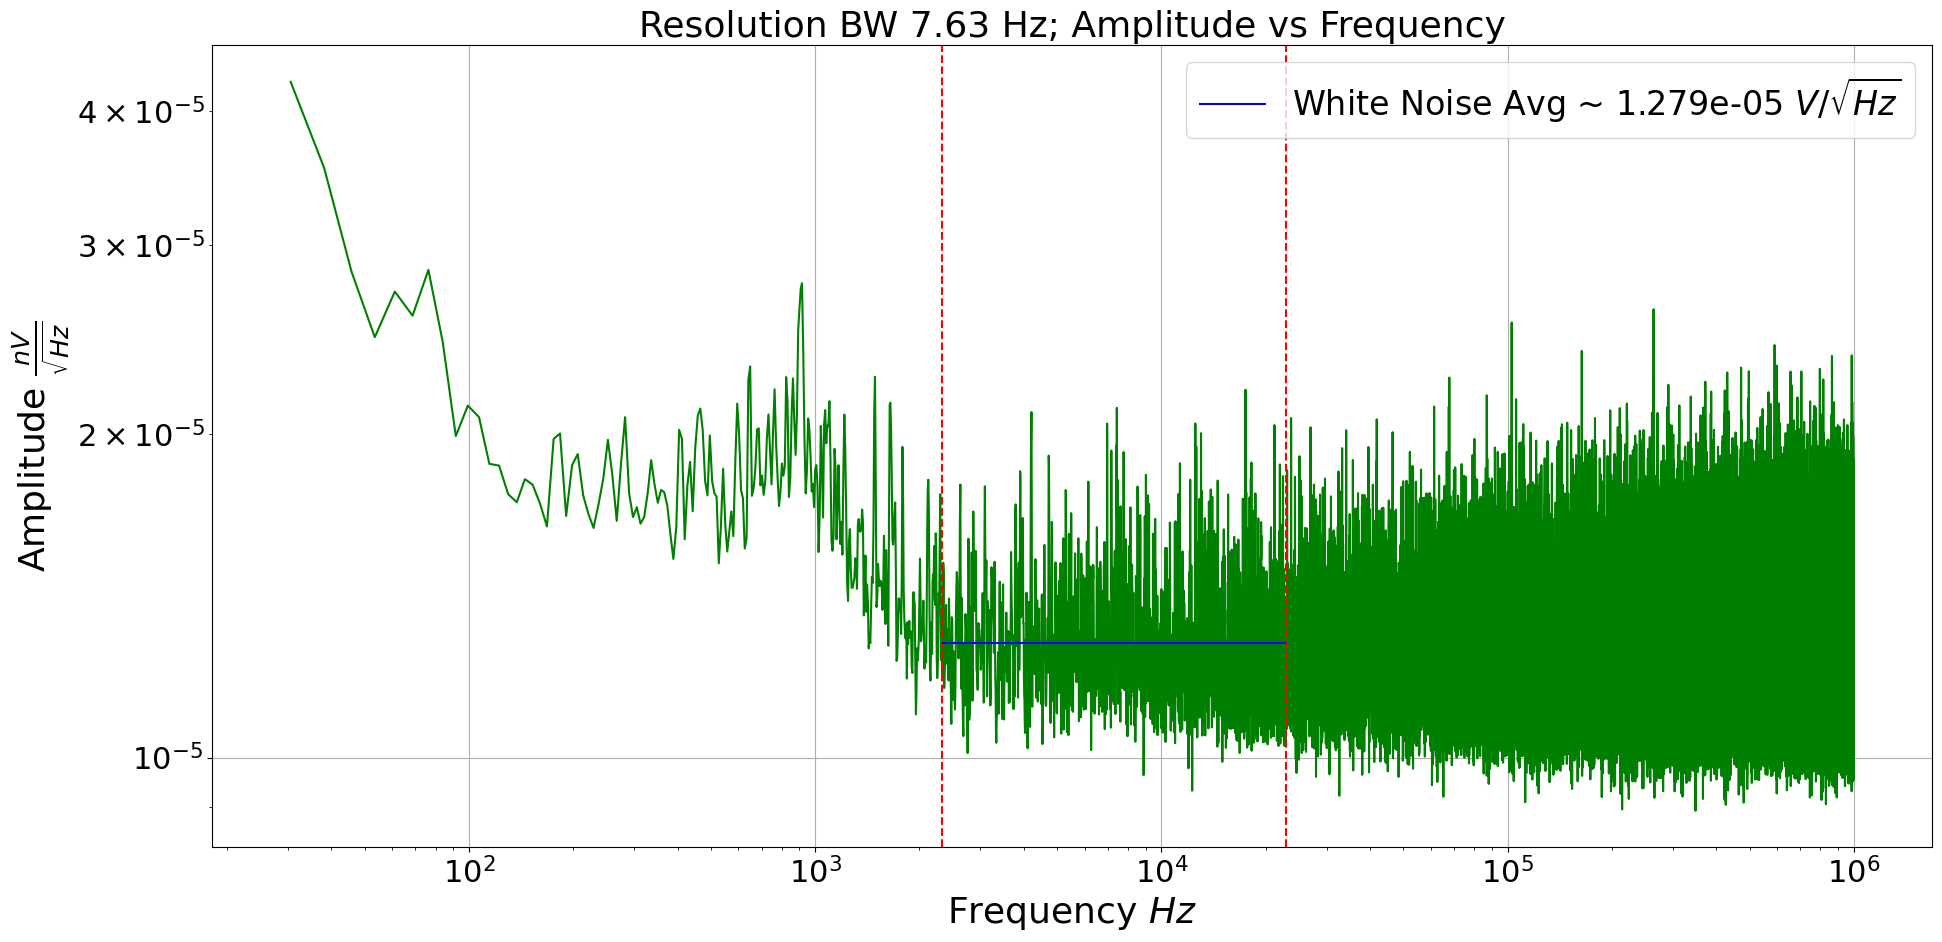

In [15]:
# ch1 was put in high mode
skip = 4
data_header = data_headers[1] 
#title = data_header
title = f'Resolution BW 7.63 Hz'
v = 100

entries = []

for key, value in data.items():
    if key.startswith(data_header) and key.endswith('_freq_data'):
        base_name = key[:-10]
        freq_key = f'{base_name}_freq_data'
        ch1_amp_key = f'{base_name}_ch1_amp_data'
        ch2_amp_key = f'{base_name}_ch2_amp_data'
        
        if freq_key in data:
            label_part = base_name[len(data_header):]
            print(label_part)
            freq_data = value
            ch1_amp_data = data[ch1_amp_key]
            ch2_amp_data = data[ch2_amp_key]
            
            numeric_label = numeric_value_from_label(label_part)

            cut_freq_data = freq_data[skip:]
            cut_ch1_amp_data = ch1_amp_data[skip:]
            cut_ch2_amp_data = ch2_amp_data[skip:]
            
            corner_freq_index = 4
            corner_freq = cut_freq_data[corner_freq_index]
            
            white_noise_index1 = 300
            white_noise_index2 = 3000
            white_noise_freq1 = cut_freq_data[white_noise_index1]
            white_noise_freq2 = cut_freq_data[white_noise_index2]
            
            white_noise1 = np.mean(cut_ch1_amp_data[white_noise_index1:white_noise_index2])
            white_noise2 = np.mean(cut_ch2_amp_data[white_noise_index1:white_noise_index2])

            entries.append({
                'label': label_part,
                'numeric_label': numeric_label,
                'freq_data': cut_freq_data,
                'ch1_amp_data': cut_ch1_amp_data,
                'ch2_amp_data': cut_ch2_amp_data,
                'corner_freq': corner_freq,
                'white_noise_freq1': white_noise_freq1, 
                'white_noise_freq2': white_noise_freq2, 
                'white_noise1': white_noise1,
                'white_noise2': white_noise2
            })

entries = sorted(entries, key=lambda x: x['numeric_label'])

plt.figure(figsize=(20, 10))

line_handles = []

for entry in entries:
    line, = plt.plot(entry['freq_data'], entry['ch1_amp_data'], color='green')#, label=f'Ch1')
    #line, = plt.plot(entry['freq_data'], entry['ch2_amp_data'], label=f'Ch2')
    line_handles.append(line)

plt.axvline(white_noise_freq1, color='red', linestyle='--')#, label=f"f1: {white_noise_freq1}")
plt.axvline(white_noise_freq2, color='red', linestyle='--')#, label=f"f2: {white_noise_freq2}")
plt.hlines(y=white_noise1, xmin=white_noise_freq1, xmax=white_noise_freq2, 
           color='blue', linestyle='-', label=f'White Noise Avg ~ {white_noise1:.3e} ' r'$V/\sqrt{Hz}$')
#plt.axvline(corner_freq, color='red', linestyle='--', label=f"Corner Frequency ~{corner_freq:.2f} Hz")
plt.xlabel(r'Frequency $Hz$ ')
plt.xscale('log')
plt.ylabel(r'Amplitude $\frac{nV}{\sqrt{Hz}}$')
plt.yscale('log')
plt.title(f'{title}; Amplitude vs Frequency')
plt.grid(True)
plt.legend()

output_path = f'Plots/4a_plots/{title}.png'
plt.savefig(output_path, format='png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

#print(f'Ch1 white noise: {white_noise1}')
#print(f'Ch2 white noise: {white_noise2}')

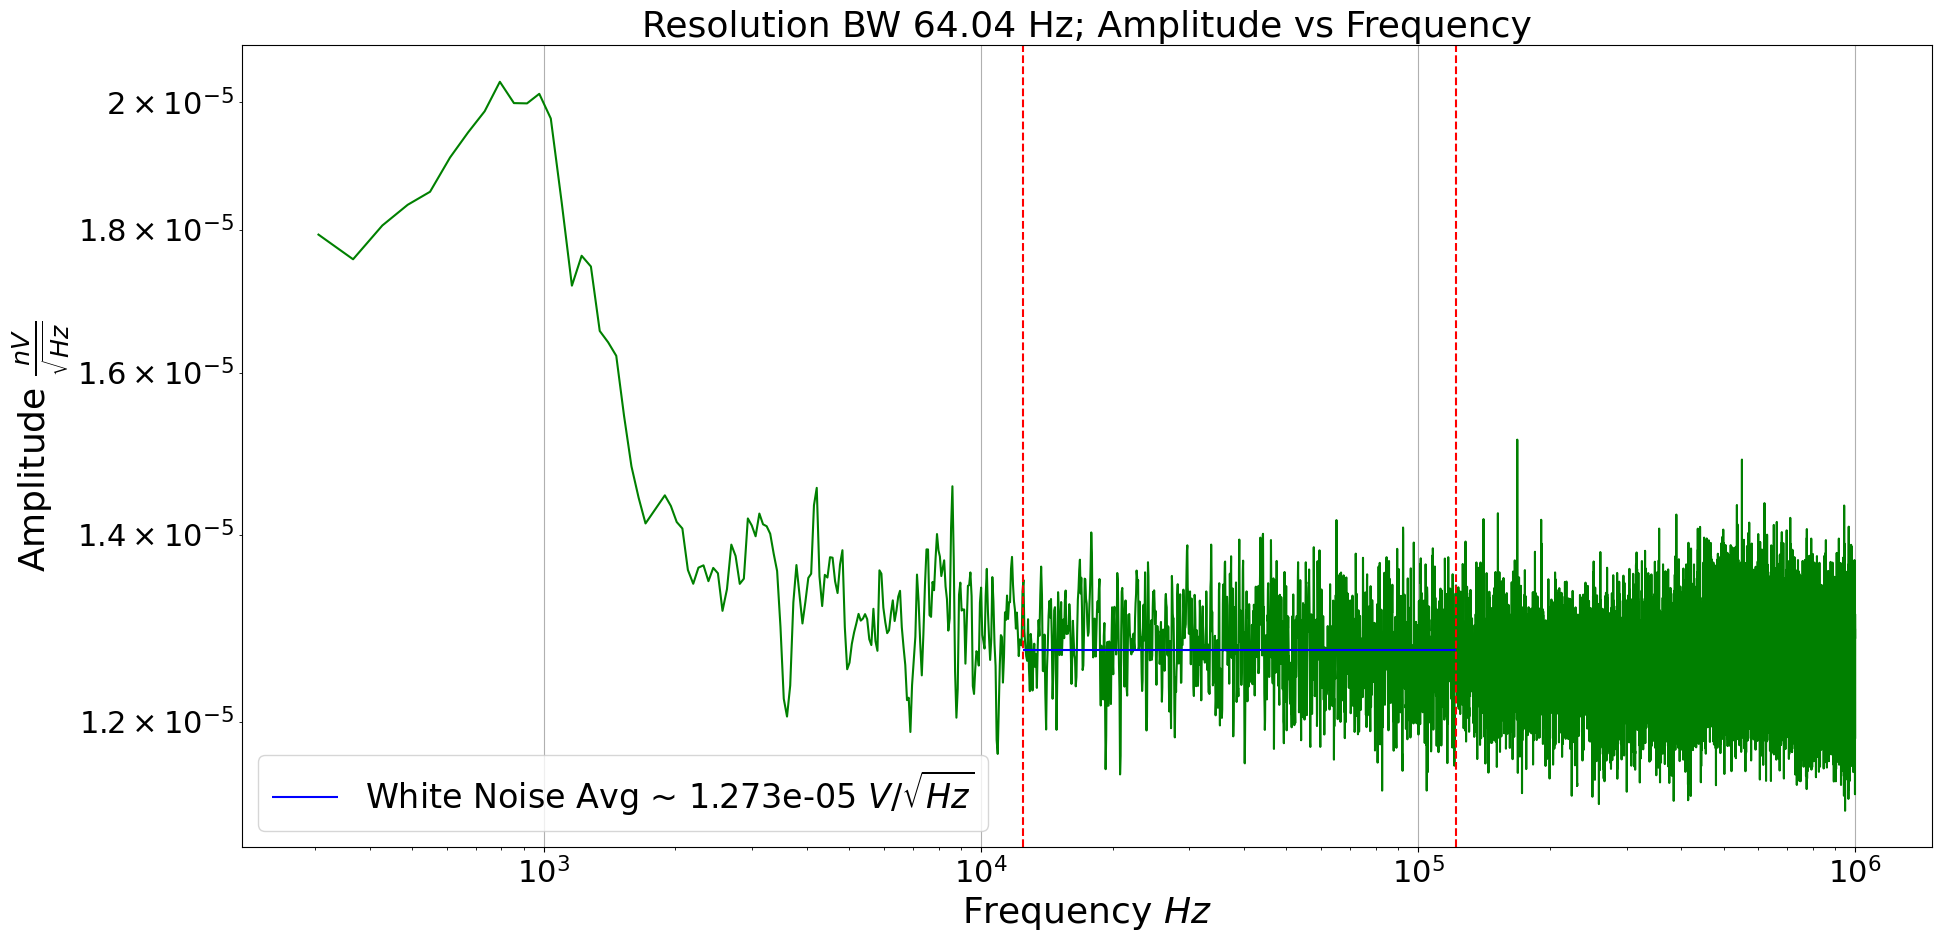

In [16]:
# ch1 was put in high mode
skip = 5
data_header = data_headers[2] 
#title = data_header
title = f'Resolution BW 64.04 Hz'
v = 100

entries = []

for key, value in data.items():
    if key.startswith(data_header) and key.endswith('_freq_data'):
        base_name = key[:-10]
        freq_key = f'{base_name}_freq_data'
        ch1_amp_key = f'{base_name}_ch1_amp_data'
        ch2_amp_key = f'{base_name}_ch2_amp_data'
        
        if freq_key in data:
            label_part = base_name[len(data_header):]
            print(label_part)
            freq_data = value
            ch1_amp_data = data[ch1_amp_key]
            ch2_amp_data = data[ch2_amp_key]
            
            numeric_label = numeric_value_from_label(label_part)

            cut_freq_data = freq_data[skip:]
            cut_ch1_amp_data = ch1_amp_data[skip:]
            cut_ch2_amp_data = ch2_amp_data[skip:]
            
            corner_freq_index = 4
            corner_freq = cut_freq_data[corner_freq_index]
            
            white_noise_index1 = 200
            white_noise_index2 = 2000
            white_noise_freq1 = cut_freq_data[white_noise_index1]
            white_noise_freq2 = cut_freq_data[white_noise_index2]
            
            white_noise1 = np.mean(cut_ch1_amp_data[white_noise_index1:white_noise_index2])
            white_noise2 = np.mean(cut_ch2_amp_data[white_noise_index1:white_noise_index2])

            entries.append({
                'label': label_part,
                'numeric_label': numeric_label,
                'freq_data': cut_freq_data,
                'ch1_amp_data': cut_ch1_amp_data,
                'ch2_amp_data': cut_ch2_amp_data,
                'corner_freq': corner_freq,
                'white_noise_freq1': white_noise_freq1, 
                'white_noise_freq2': white_noise_freq2, 
                'white_noise1': white_noise1,
                'white_noise2': white_noise2
            })

entries = sorted(entries, key=lambda x: x['numeric_label'])

plt.figure(figsize=(20, 10))

line_handles = []

for entry in entries:
    line, = plt.plot(entry['freq_data'], entry['ch1_amp_data'], color='green')# label=f'Ch1')
    #line, = plt.plot(entry['freq_data'], entry['ch2_amp_data'], label=f'Ch2')
    line_handles.append(line)

plt.axvline(white_noise_freq1, color='red', linestyle='--')#, label=f"f1: {white_noise_freq1}")
plt.axvline(white_noise_freq2, color='red', linestyle='--')#, label=f"f2: {white_noise_freq2}")
plt.hlines(y=white_noise1, xmin=white_noise_freq1, xmax=white_noise_freq2, 
           color='blue', linestyle='-', label=f'White Noise Avg ~ {white_noise1:.3e} ' r'$V/\sqrt{Hz}$')
#plt.axvline(corner_freq, color='red', linestyle='--', label=f"Corner Frequency ~{corner_freq:.2f} Hz")
plt.xlabel(r'Frequency $Hz$ ')
plt.xscale('log')
plt.ylabel(r'Amplitude $\frac{nV}{\sqrt{Hz}}$')
plt.yscale('log')
plt.title(f'{title}; Amplitude vs Frequency')
plt.grid(True)
plt.legend()

output_path = f'Plots/4a_plots/{title}.png'
plt.savefig(output_path, format='png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

#print(f'Ch1 white noise: {white_noise1}')
#print(f'Ch2 white noise: {white_noise2}')

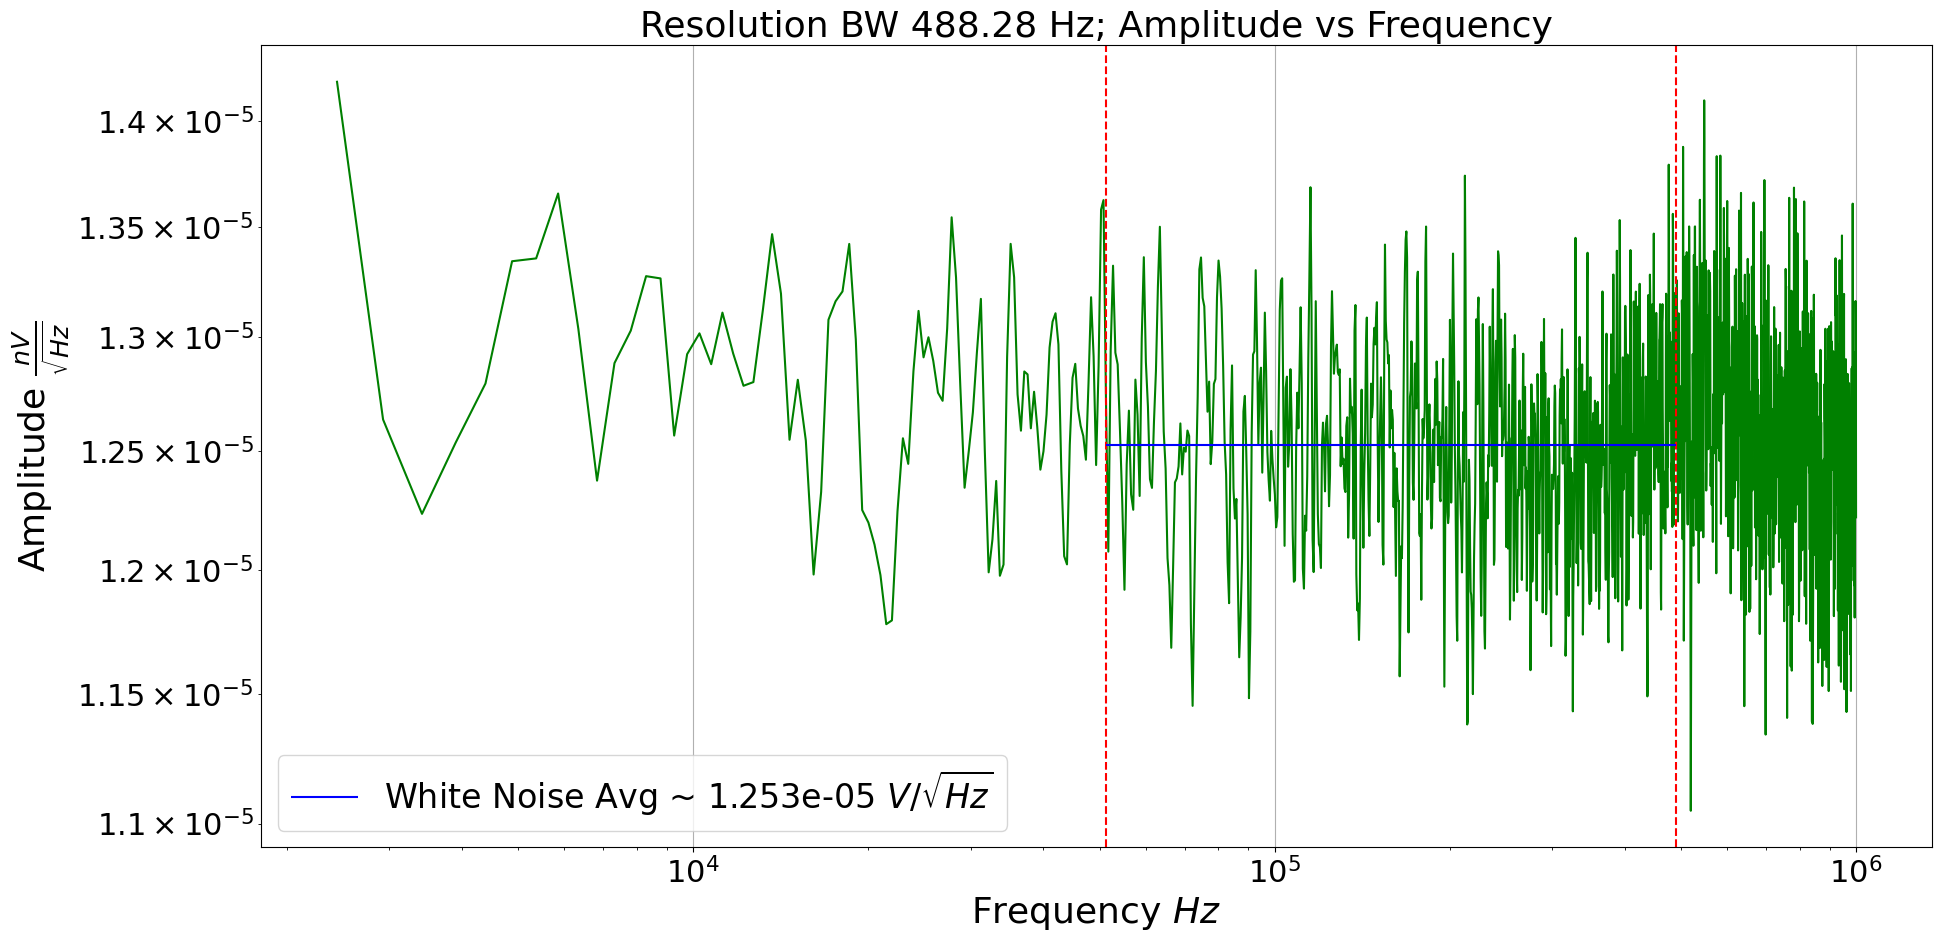

In [17]:
# ch1 was put in high mode
skip = 5
data_header = data_headers[3] 
title = f'Resolution BW 488.28 Hz'
v = 7

entries = []

for key, value in data.items():
    if key.startswith(data_header) and key.endswith('_freq_data'):
        base_name = key[:-10]
        freq_key = f'{base_name}_freq_data'
        ch1_amp_key = f'{base_name}_ch1_amp_data'
        ch2_amp_key = f'{base_name}_ch2_amp_data'
        
        if freq_key in data:
            label_part = base_name[len(data_header):]
            print(label_part)
            freq_data = value
            ch1_amp_data = data[ch1_amp_key]
            ch2_amp_data = data[ch2_amp_key]
            
            numeric_label = numeric_value_from_label(label_part)

            cut_freq_data = freq_data[skip:]
            cut_ch1_amp_data = ch1_amp_data[skip:]
            cut_ch2_amp_data = ch2_amp_data[skip:]
            
            corner_freq_index = 4
            corner_freq = cut_freq_data[corner_freq_index]
            
            white_noise_index1 = 100
            white_noise_index2 = 1000
            white_noise_freq1 = cut_freq_data[white_noise_index1]
            white_noise_freq2 = cut_freq_data[white_noise_index2]
            
            white_noise1 = np.mean(cut_ch1_amp_data[white_noise_index1:white_noise_index2])
            white_noise2 = np.mean(cut_ch2_amp_data[white_noise_index1:white_noise_index2])

            entries.append({
                'label': label_part,
                'numeric_label': numeric_label,
                'freq_data': cut_freq_data,
                'ch1_amp_data': cut_ch1_amp_data,
                'ch2_amp_data': cut_ch2_amp_data,
                'corner_freq': corner_freq,
                'white_noise_freq1': white_noise_freq1, 
                'white_noise_freq2': white_noise_freq2, 
                'white_noise1': white_noise1,
                'white_noise2': white_noise2
            })

entries = sorted(entries, key=lambda x: x['numeric_label'])

plt.figure(figsize=(20, 10))

line_handles = []

for entry in entries:
    line, = plt.plot(entry['freq_data'], entry['ch1_amp_data'], color='green') #label=f'Ch1')
    #line, = plt.plot(entry['freq_data'], entry['ch2_amp_data'], label=f'Ch2')
    line_handles.append(line)

plt.axvline(white_noise_freq1, color='red', linestyle='--')#, label=f"f1: {white_noise_freq1}")
plt.axvline(white_noise_freq2, color='red', linestyle='--')#, label=f"f2: {white_noise_freq2}")
plt.hlines(y=white_noise1, xmin=white_noise_freq1, xmax=white_noise_freq2, 
           color='blue', linestyle='-', label=f'White Noise Avg ~ {white_noise1:.3e} ' r'$V/\sqrt{Hz}$')
#plt.axvline(corner_freq, color='red', linestyle='--', label=f"Corner Frequency ~{corner_freq:.2f} Hz")
plt.xlabel(r'Frequency $Hz$ ')
plt.xscale('log')
plt.ylabel(r'Amplitude $\frac{nV}{\sqrt{Hz}}$')
plt.yscale('log')
plt.title(f'{title}; Amplitude vs Frequency')
plt.grid(True)
plt.legend()

output_path = f'Plots/4a_plots/{title}.png'
plt.savefig(output_path, format='png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

#print(f'Ch1 white noise: {white_noise1}')
#print(f'Ch2 white noise: {white_noise2}')

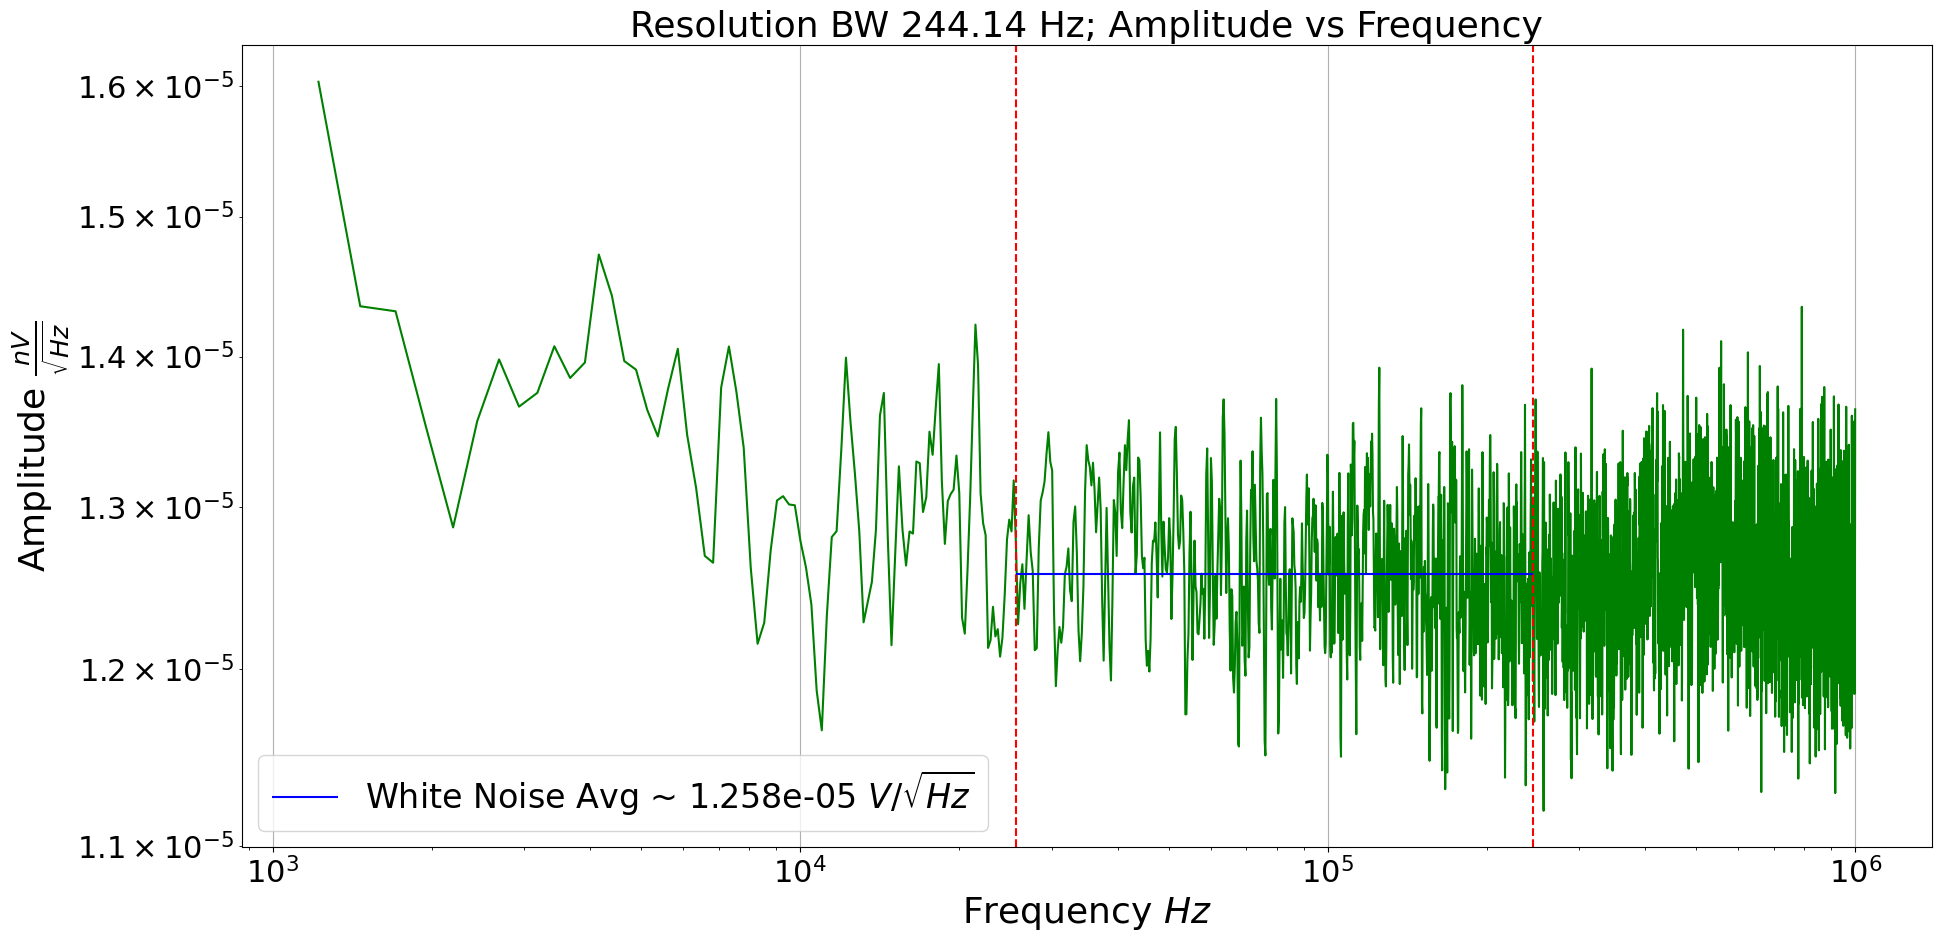

In [18]:
# ch1 was put in high mode
skip = 5
data_header = data_headers[4] 
#title = data_header
title = f'Resolution BW 244.14 Hz'
v = 7

entries = []

for key, value in data.items():
    if key.startswith(data_header) and key.endswith('_freq_data'):
        base_name = key[:-10]
        freq_key = f'{base_name}_freq_data'
        ch1_amp_key = f'{base_name}_ch1_amp_data'
        ch2_amp_key = f'{base_name}_ch2_amp_data'
        
        if freq_key in data:
            label_part = base_name[len(data_header):]
            print(label_part)
            freq_data = value
            ch1_amp_data = data[ch1_amp_key]
            ch2_amp_data = data[ch2_amp_key]
            
            numeric_label = numeric_value_from_label(label_part)

            cut_freq_data = freq_data[skip:]
            cut_ch1_amp_data = ch1_amp_data[skip:]
            cut_ch2_amp_data = ch2_amp_data[skip:]
            
            corner_freq_index = 4
            corner_freq = cut_freq_data[corner_freq_index]
            
            white_noise_index1 = 100
            white_noise_index2 = 1000
            white_noise_freq1 = cut_freq_data[white_noise_index1]
            white_noise_freq2 = cut_freq_data[white_noise_index2]
            
            white_noise1 = np.mean(cut_ch1_amp_data[white_noise_index1:white_noise_index2])
            white_noise2 = np.mean(cut_ch2_amp_data[white_noise_index1:white_noise_index2])

            entries.append({
                'label': label_part,
                'numeric_label': numeric_label,
                'freq_data': cut_freq_data,
                'ch1_amp_data': cut_ch1_amp_data,
                'ch2_amp_data': cut_ch2_amp_data,
                'corner_freq': corner_freq,
                'white_noise_freq1': white_noise_freq1, 
                'white_noise_freq2': white_noise_freq2, 
                'white_noise1': white_noise1,
                'white_noise2': white_noise2
            })

entries = sorted(entries, key=lambda x: x['numeric_label'])

plt.figure(figsize=(20, 10))

line_handles = []

for entry in entries:
    line, = plt.plot(entry['freq_data'], entry['ch1_amp_data'], color='green') #label=f'Ch1')
    #line, = plt.plot(entry['freq_data'], entry['ch2_amp_data'], label=f'Ch2')
    line_handles.append(line)

plt.axvline(white_noise_freq1, color='red', linestyle='--')#, label=f"f1: {white_noise_freq1}")
plt.axvline(white_noise_freq2, color='red', linestyle='--')#, label=f"f2: {white_noise_freq2}")
plt.hlines(y=white_noise1, xmin=white_noise_freq1, xmax=white_noise_freq2, 
           color='blue', linestyle='-', label=f'White Noise Avg ~ {white_noise1:.3e} ' r'$V/\sqrt{Hz}$')
plt.xlabel(r'Frequency $Hz$ ')
plt.xscale('log')
plt.ylabel(r'Amplitude $\frac{nV}{\sqrt{Hz}}$')
plt.yscale('log')
plt.title(f'{title}; Amplitude vs Frequency')
plt.grid(True)
plt.legend()

output_path = f'Plots/4a_plots/{title}.png'
plt.savefig(output_path, format='png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

#print(f'Ch1 white noise: {white_noise1}')
#print(f'Ch2 white noise: {white_noise2}')

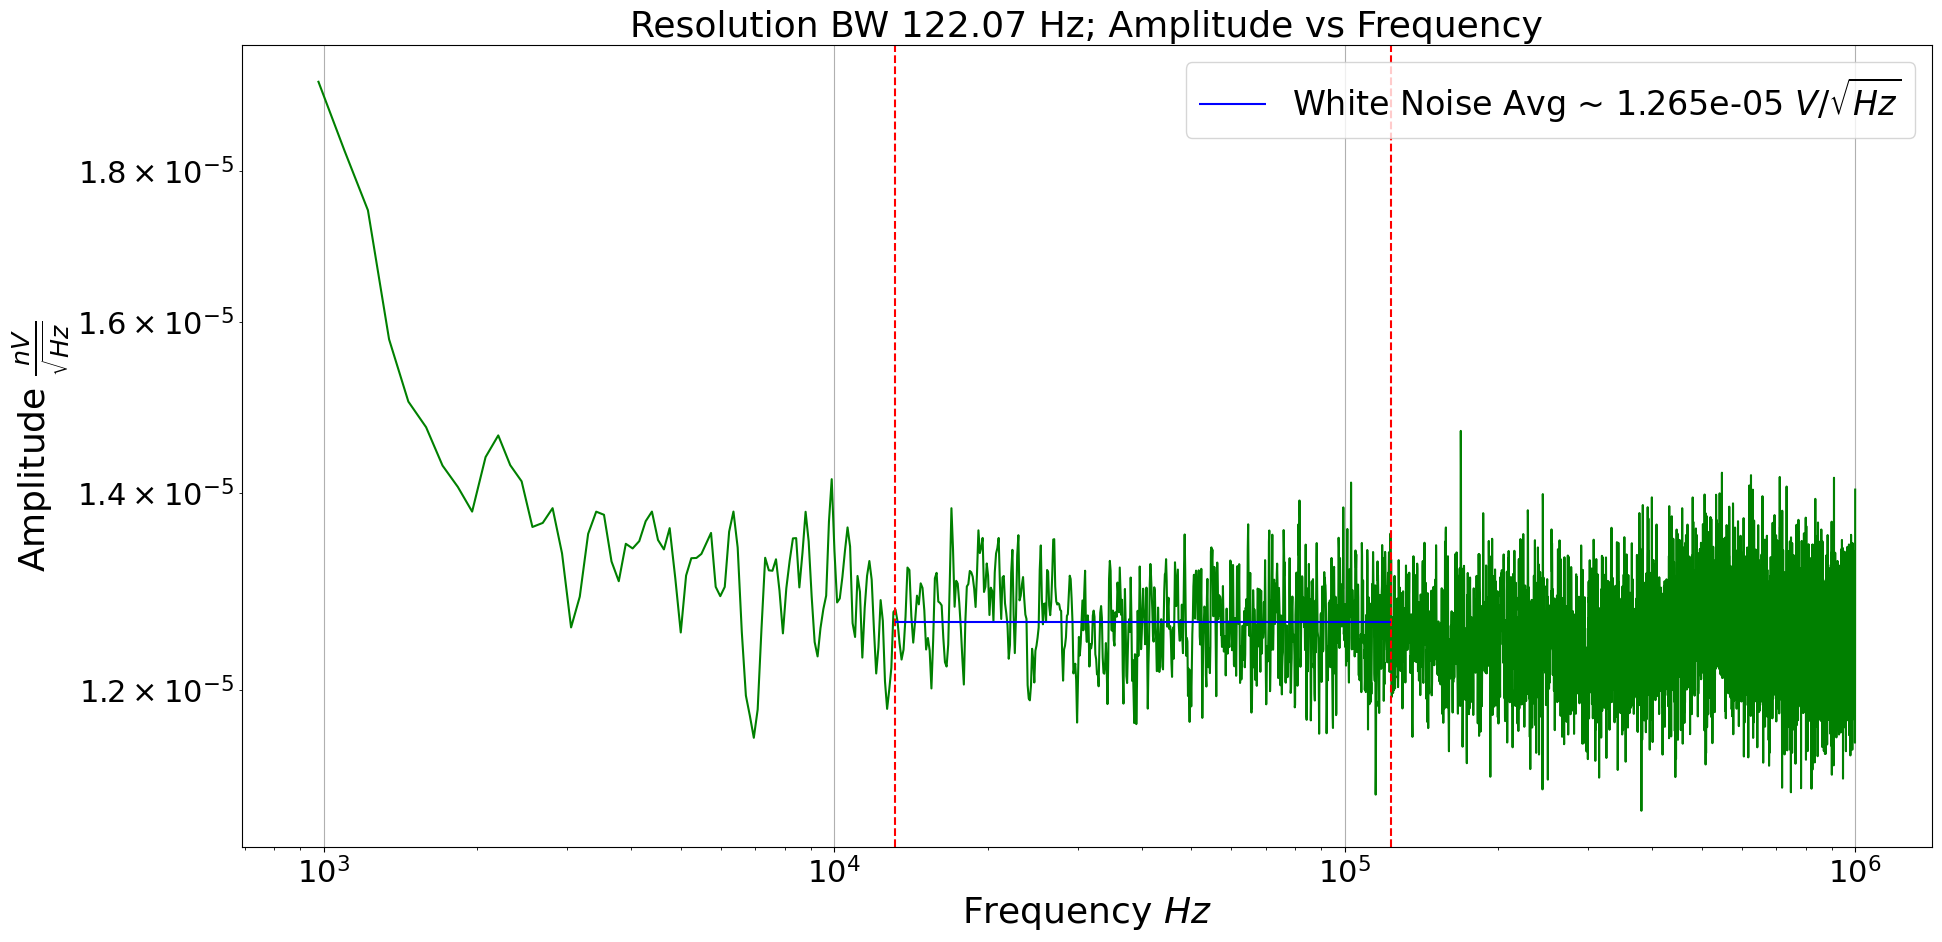

In [19]:
# ch1 was put in high mode
skip = 8
data_header = data_headers[5] 
#title = data_header
title = f'Resolution BW 122.07 Hz'
v = 7

entries = []

for key, value in data.items():
    if key.startswith(data_header) and key.endswith('_freq_data'):
        base_name = key[:-10]
        freq_key = f'{base_name}_freq_data'
        ch1_amp_key = f'{base_name}_ch1_amp_data'
        ch2_amp_key = f'{base_name}_ch2_amp_data'
        
        if freq_key in data:
            label_part = base_name[len(data_header):]
            print(label_part)
            freq_data = value
            ch1_amp_data = data[ch1_amp_key]
            ch2_amp_data = data[ch2_amp_key]
            
            numeric_label = numeric_value_from_label(label_part)

            cut_freq_data = freq_data[skip:]
            cut_ch1_amp_data = ch1_amp_data[skip:]
            cut_ch2_amp_data = ch2_amp_data[skip:]
            
            corner_freq_index = 4
            corner_freq = cut_freq_data[corner_freq_index]
            
            white_noise_index1 = 100
            white_noise_index2 = 1000
            white_noise_freq1 = cut_freq_data[white_noise_index1]
            white_noise_freq2 = cut_freq_data[white_noise_index2]
            
            white_noise1 = np.mean(cut_ch1_amp_data[white_noise_index1:white_noise_index2])
            white_noise2 = np.mean(cut_ch2_amp_data[white_noise_index1:white_noise_index2])

            entries.append({
                'label': label_part,
                'numeric_label': numeric_label,
                'freq_data': cut_freq_data,
                'ch1_amp_data': cut_ch1_amp_data,
                'ch2_amp_data': cut_ch2_amp_data,
                'corner_freq': corner_freq,
                'white_noise_freq1': white_noise_freq1, 
                'white_noise_freq2': white_noise_freq2, 
                'white_noise1': white_noise1,
                'white_noise2': white_noise2
            })

entries = sorted(entries, key=lambda x: x['numeric_label'])

plt.figure(figsize=(20, 10))

line_handles = []

for entry in entries:
    line, = plt.plot(entry['freq_data'], entry['ch1_amp_data'], color='green')# label=f'Ch1')
    #line, = plt.plot(entry['freq_data'], entry['ch2_amp_data'], label=f'Ch2')
    line_handles.append(line)

plt.axvline(white_noise_freq1, color='red', linestyle='--')#, label=f"f1: {white_noise_freq1}")
plt.axvline(white_noise_freq2, color='red', linestyle='--')#, label=f"f2: {white_noise_freq2}")
plt.hlines(y=white_noise1, xmin=white_noise_freq1, xmax=white_noise_freq2, 
           color='blue', linestyle='-', label=f'White Noise Avg ~ {white_noise1:.3e} ' r'$V/\sqrt{Hz}$')
#plt.axvline(corner_freq, color='red', linestyle='--', label=f"Corner Frequency ~{corner_freq:.2f} Hz")
plt.xlabel(r'Frequency $Hz$ ')
plt.xscale('log')
plt.ylabel(r'Amplitude $\frac{nV}{\sqrt{Hz}}$')
plt.yscale('log')
plt.title(f'{title}; Amplitude vs Frequency')
plt.grid(True)
plt.legend()

output_path = f'Plots/4a_plots/{title}.png'
plt.savefig(output_path, format='png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

#print(f'Ch1 white noise: {white_noise1}')
#print(f'Ch2 white noise: {white_noise2}')